In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
import pandas as pd
from planet_cookbook import read_reports as rr
import os
import rebound
import seaborn as sns

sol_to_earth = 332946.078
G = 6.6743* 10**(-11) #N⋅m2/kg2
M_sun = 1.989e+33 #g
AU = 1.496e+13 #cm

In [2]:
params = {
   'axes.labelsize': 15,
   'font.size': 15,
   'legend.fontsize': 10,
   'xtick.labelsize': 15,
   'ytick.labelsize': 15,
   'text.usetex': True, #to use TeX in your labels
   'font.family':'serif',
   'axes.titlesize': 15
   }
rcParams.update(params)

In [3]:
#Color-blind friendly pallete
colors = [
    "#0C7BDC",  # Vibrant Blue
    "#E66100",  # Bright Orange
    "#40B0A6",  # Teal/Aqua
    "#8B8D8B",  # Medium Grey
    "#5D3A9B"   # Muted Purple
]

vib_blue = "#0C7BDC"
teal = "#40B0A6"
purple = "#5D3A9B" 

In [4]:
solar_system_df = pd.read_csv('solarsystem.csv')
mercury = solar_system_df[solar_system_df['name'] == 'Mercury']
venus = solar_system_df[solar_system_df['name'] == 'Venus']
earth = solar_system_df[solar_system_df['name'] == 'Earth']
mars = solar_system_df[solar_system_df['name'] == 'Mars']

In [5]:
base_path = "/Users/honeyeah/Codes/data/" #folder with all data

sim_set = "ueda_v3/" #name of simulation set, folder with subfolders the name "sim_set_i"
sim_archive_path = base_path + sim_set + "ueda_v3_" #path given to get_runtime_data function
ueda_v3_rdf = rr.get_runtime_data(sim_archive_path, 60, "ueda_v3_") #rdf is runtime data frame

sim_set = "cham_bench/" #name of simulation set, folder with subfolders the name "sim_set_i"
sim_archive_path = base_path + sim_set + "cham_bench_" #path given to get_runtime_data function
cham_bench_rdf = rr.get_runtime_data(sim_archive_path, 60, "cham_simarchive_") #rdf is runtime data frame

sim_set = "cham_cont/" #name of simulation set, folder with subfolders the name "sim_set_i"
sim_archive_path = base_path + sim_set + "cham_cont_" #path given to get_runtime_data function
cham_cont_rdf = rr.get_runtime_data(sim_archive_path, 60, "cham_cont_") #rdf is runtime data frame

cut_time = 299.9e6

n_runs = 60

maxtimes_ueda_v3 = np.array([
    ueda_v3_rdf[ueda_v3_rdf['simulation_id'] == i + 1]['time'].max()
    for i in range(n_runs)
])

maxtimes_cham_bench = np.array([
    cham_bench_rdf[cham_bench_rdf['simulation_id'] == i + 1]['time'].max()
    for i in range(n_runs)
])

maxtimes_cham_cont = np.array([
    cham_cont_rdf[cham_cont_rdf['simulation_id'] == i + 1]['time'].max()
    for i in range(n_runs)
])

keep_ueda_v3 = np.where(maxtimes_ueda_v3 > 299.9e6)[0]
keep_cham_bench = np.where(maxtimes_cham_bench > 299.9e6)[0]
keep_cham_cont = np.where(maxtimes_cham_cont > 299.9e6)[0]

print("number of finished runs\n")
print(f"ueda_v3: {len(keep_ueda_v3)}")
print(f"cham_bench: {len(keep_cham_bench)}")
print(f"cham_cont: {len(keep_cham_cont)}")

/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:103: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed. Binary file was saved with REBOUND Version 4.4.7. You are currently using REBOUND Version 4.4.8.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:103: Run

number of finished runs

ueda_v3: 52
cham_bench: 39
cham_cont: 25


# READ particle parameters and planet compositions for different parts of the CMF grid

In [6]:
len(keep_cham_bench)

39

In [7]:
cham_bench_ppdf_list = rr.get_particle_params_at_time(
    f"/Users/honeyeah/Codes/data/cham_bench/cham_bench_", keep_cham_bench, "cham_simarchive_", cut_time
)

cham_bench_ppdf = pd.concat(cham_bench_ppdf_list)

/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:103: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed. Binary file was saved with REBOUND Version 4.4.7. You are currently using REBOUND Version 4.4.8.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:103: Run

In [8]:
# Read the parameter grid
cmf_grid = pd.read_csv("/Users/honeyeah/Codes/coregiver/examples/cham_bench/cham_bench_cmf_grid.csv")

# List to collect all simulations
all_simulations = []

# Loop over each (bound, perc) combination
for bound, perc in zip(cmf_grid['bounds'], cmf_grid['percentages']):
    for sim_id in keep_cham_bench + 1:  # sim_id from 1 to 10
        path = f"/Users/honeyeah/Codes/data/cham_bench/cham_bench_{sim_id}/cham_bench_output_step_b{bound}_p{perc}.txt"
        
        # Read the data
        df = rr.read_dbct_output(path, 0.33, bound, perc)

        # Add metadata columns
        df['boundary'] = bound
        df['percentage'] = perc
        df['sim_id'] = sim_id
        this_sim = cham_bench_ppdf[cham_bench_ppdf['sim_id'] == sim_id - 1]
        df['semi'] = this_sim['semi']

        # Add to the global list
        all_simulations.append(df)

# Combine everything into one DataFrame
cham_bench_full_df = pd.concat(all_simulations, ignore_index=True)

In [9]:
cham_bench_full_df.to_csv("cham_bench_grid_fulldf.csv")

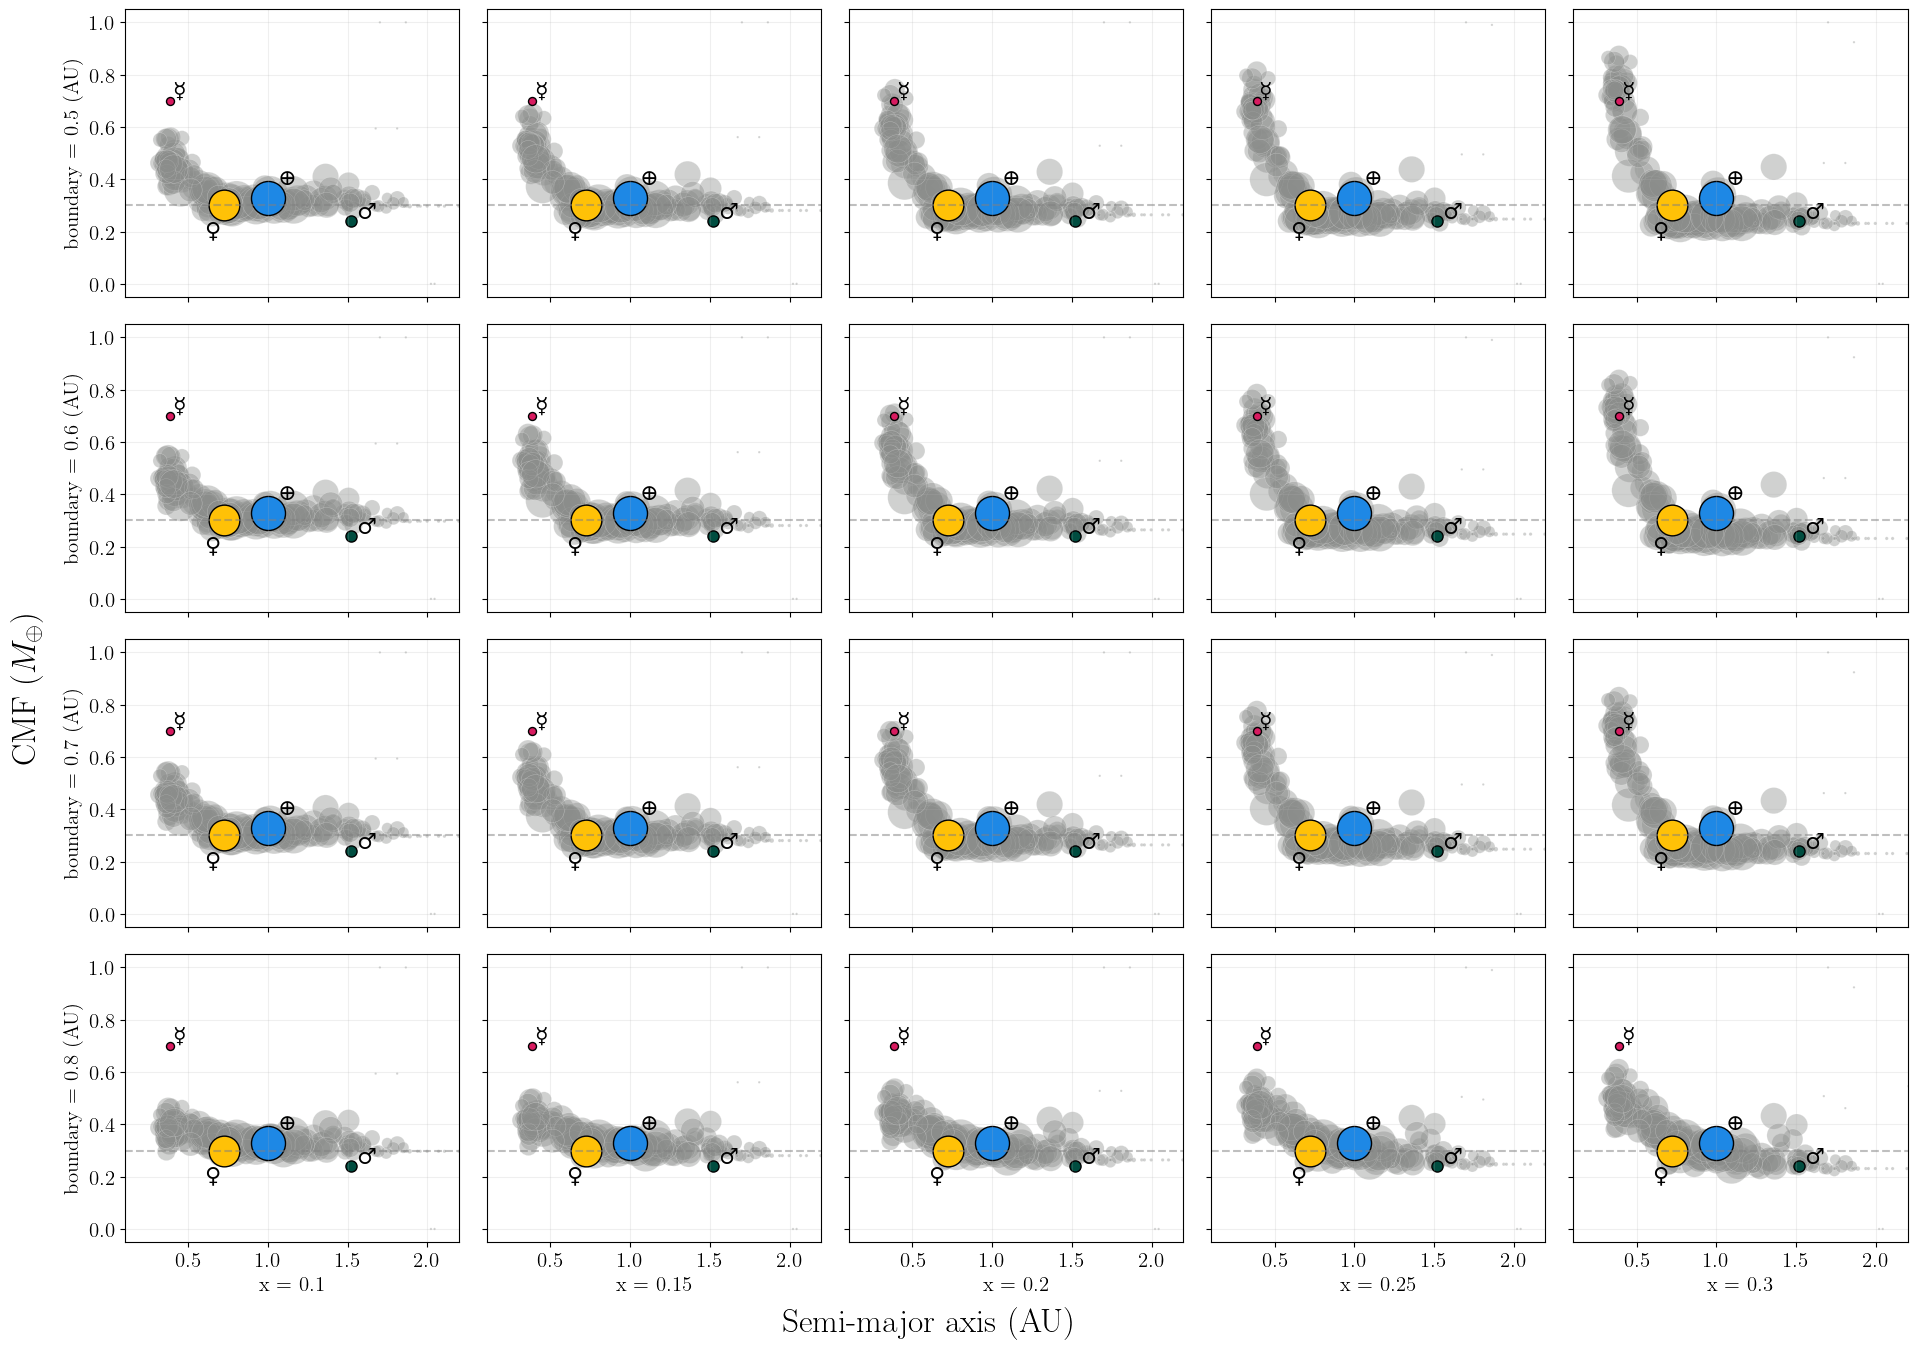

time = 3.00e+08 yrs


In [10]:
# Ensure these are sorted for consistent subplot layout
unique_bounds = sorted(cham_bench_full_df['boundary'].unique())
unique_percs = sorted(cham_bench_full_df['percentage'].unique())

dot_scale = 600

# Create grid of subplots
fig, axes = plt.subplots(len(unique_bounds), len(unique_percs),
                         figsize=(4 * len(unique_percs), 3.5 * len(unique_bounds)),
                         sharex=True, sharey=True)

# Loop through the grid
for i, bound in enumerate(unique_bounds):
    for j, perc in enumerate(unique_percs):
        ax = axes[i][j] if len(unique_bounds) > 1 else (axes[j] if len(unique_percs) > 1 else axes)
        
        # Filter for this combination
        df_subset = cham_bench_full_df[(cham_bench_full_df['boundary'] == bound) &
                                (cham_bench_full_df['percentage'] == perc)]
        
        if not df_subset.empty:
            #ax.scatter(df_subset['semi'], df_subset['cmf'],
            #           s=df_subset['mass'] * sol_to_earth * 200,
            #           alpha=0.3, color=colors[3], edgecolor = 'black')
            ax.scatter(
            df_subset['semi'], df_subset['cmf'],
            s=df_subset['mass'] * sol_to_earth * dot_scale,
            alpha=0.4, facecolors=colors[3],
            edgecolors='w', linewidths=0.3
            )


            # Solar System references
            # Add Mercury & Earth
            ax.scatter(0.387, 0.7, color='#D81B60', edgecolors='black', linewidths=1, s= 0.055 * dot_scale, label = 'Mercury')
            ax.annotate('☿', [0.4, 0.71], fontsize=16, usetex=False)

            ax.scatter(0.723, 0.3, color='#FFC107', edgecolors='black', linewidths=1, s=0.815 * dot_scale, label = 'Venus')
            ax.annotate('♀', [0.60, 0.18], fontsize=16, usetex=False)

            ax.scatter(1, 0.33, color='#1E88E5', edgecolors='black', linewidths=1, s=dot_scale, label = 'Earth')
            ax.annotate('⊕', [1.06, 0.38], fontsize=16, usetex=False)

            ax.scatter(1.52, 0.24, color='#004D40', edgecolors='black', linewidths=1, s=0.107 * dot_scale, label = 'Mars')
            ax.annotate('♂', [1.55, 0.25], fontsize=16, usetex=False)

            # Reference lines
            ax.plot([0.1, 2.2], [0.3, 0.3], linestyle='dashed', color='grey', alpha=0.5)
        
            ax.set_xlim(0.1, 2.2)
            ax.grid(True, alpha = 0.2)
        
        else:
            ax.axis('off')  # No data: hide subplot
        
        # Axis labeling for clarity
        if i == len(unique_bounds) - 1:
            ax.set_xlabel(f"x = {perc}")
        if j == 0:
            ax.set_ylabel(f"boundary = {bound} (AU)")

# Shared axis labels
fig.text(0.5, 0.04, 'Semi-major axis (AU)', ha='center', fontsize = 24)
fig.text(0.04, 0.5, r'CMF ($M_\oplus$)', va='center', rotation='vertical', fontsize=24)

# Global formatting
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
#plt.suptitle("Cham_bench Outputs by (bound, perc)", fontsize=14, y=1.02)
plt.show()

# Print time if defined
try:
    print(f"time = {cut_time:.2e} yrs")
except NameError:
    pass


fig.savefig("paper_plots/grid_cham_bench_model1.pdf", dpi=300)

In [11]:
cham_bench_full_df

,hash,mass,cmf,tot_disk_cmf,boundary,percentage,sim_id,semi
0,1.000000e+00,7.842082e-07,0.431900,0.33,0.5,0.1,1,0.349708
1,2.000000e+00,5.796768e-07,0.557105,0.33,0.5,0.1,1,0.459960
2,5.000000e+00,3.638845e-06,0.290364,0.33,0.5,0.1,1,0.773525
3,1.200000e+01,1.267064e-06,0.384060,0.33,0.5,0.1,1,1.504560
4,1.140000e+02,2.800000e-08,0.297000,0.33,0.5,0.1,1,1.870077
...,...,...,...,...,...,...,...,...
4095,1.400000e+02,2.800000e-08,0.231000,0.33,0.8,0.3,53,2.069600
4096,2.875472e+09,1.500960e-08,0.000000,0.33,0.8,0.3,53,5.203767
4097,1.000000e+00,2.081548e-06,0.497590,0.33,0.8,0.3,56,0.408124
4098,4.000000e+00,2.829744e-06,0.319130,0.33,0.8,0.3,56,0.943007


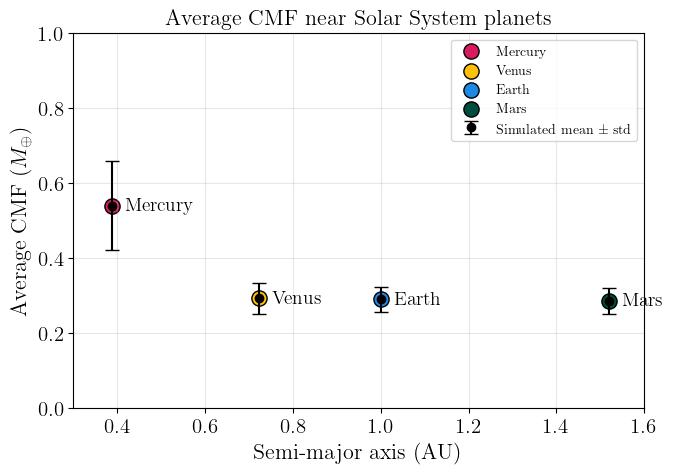

In [12]:
# Get planet semi-major axes
planet_names = ['Mercury', 'Venus', 'Earth', 'Mars']
planet_colors = ['#D81B60', '#FFC107', '#1E88E5', '#004D40']
a_centers = [mercury['a'].values[0], venus['a'].values[0], earth['a'].values[0], mars['a'].values[0]]

# Prepare arrays for results
mean_cmfs = []
std_cmfs = []
n_in_bin = []

# Use all data (or filter as you wish)
df = cham_bench_full_df
bin_half_width = 0.1

for a in a_centers:
    in_bin = (df['semi'] >= a - bin_half_width) & (df['semi'] <= a + bin_half_width)
    cmfs = df.loc[in_bin, 'cmf']
    mean_cmfs.append(cmfs.mean())
    std_cmfs.append(cmfs.std())
    n_in_bin.append(len(cmfs))

# Plot
fig, ax = plt.subplots(figsize=(7, 5))
ax.errorbar(a_centers, mean_cmfs, yerr=std_cmfs, fmt='o', color='k', capsize=5, label='Simulated mean ± std')
for i, name in enumerate(planet_names):
    ax.scatter(a_centers[i], mean_cmfs[i], color=planet_colors[i], s=120, edgecolor='black', label=name)
    ax.annotate(name, (a_centers[i]+0.03, mean_cmfs[i]), fontsize=14, va='center')

ax.set_xlabel('Semi-major axis (AU)', fontsize=16)
ax.set_ylabel(r'Average CMF ($M_\oplus$)', fontsize=16)
ax.set_title('Average CMF near Solar System planets', fontsize=16)
ax.set_xlim(0.3, 1.6)
ax.set_ylim(0, 1)
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

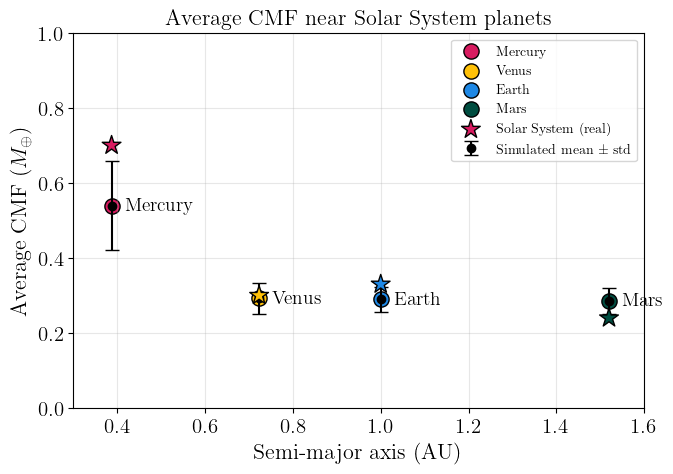

In [13]:
# ...existing code...
# Plot simulated means with errorbars (already present)
fig, ax = plt.subplots(figsize=(7, 5))
ax.errorbar(a_centers, mean_cmfs, yerr=std_cmfs, fmt='o', color='k', capsize=5, label='Simulated mean ± std')
for i, name in enumerate(planet_names):
    ax.scatter(a_centers[i], mean_cmfs[i], color=planet_colors[i], s=120, edgecolor='black', label=name)
    ax.annotate(name, (a_centers[i]+0.03, mean_cmfs[i]), fontsize=14, va='center')

# Overlay real Solar System planet values (no errorbars)
real_cmfs = [mercury['CMF'].values[0], venus['CMF'].values[0], earth['CMF'].values[0], mars['CMF'].values[0]]
ax.scatter(a_centers, real_cmfs, color=planet_colors, s=200, marker='*', edgecolor='black', label='Solar System (real)', zorder=5)

ax.set_xlabel('Semi-major axis (AU)', fontsize=16)
ax.set_ylabel(r'Average CMF ($M_\oplus$)', fontsize=16)
ax.set_title('Average CMF near Solar System planets', fontsize=16)
ax.set_xlim(0.3, 1.6)
ax.set_ylim(0, 1)
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

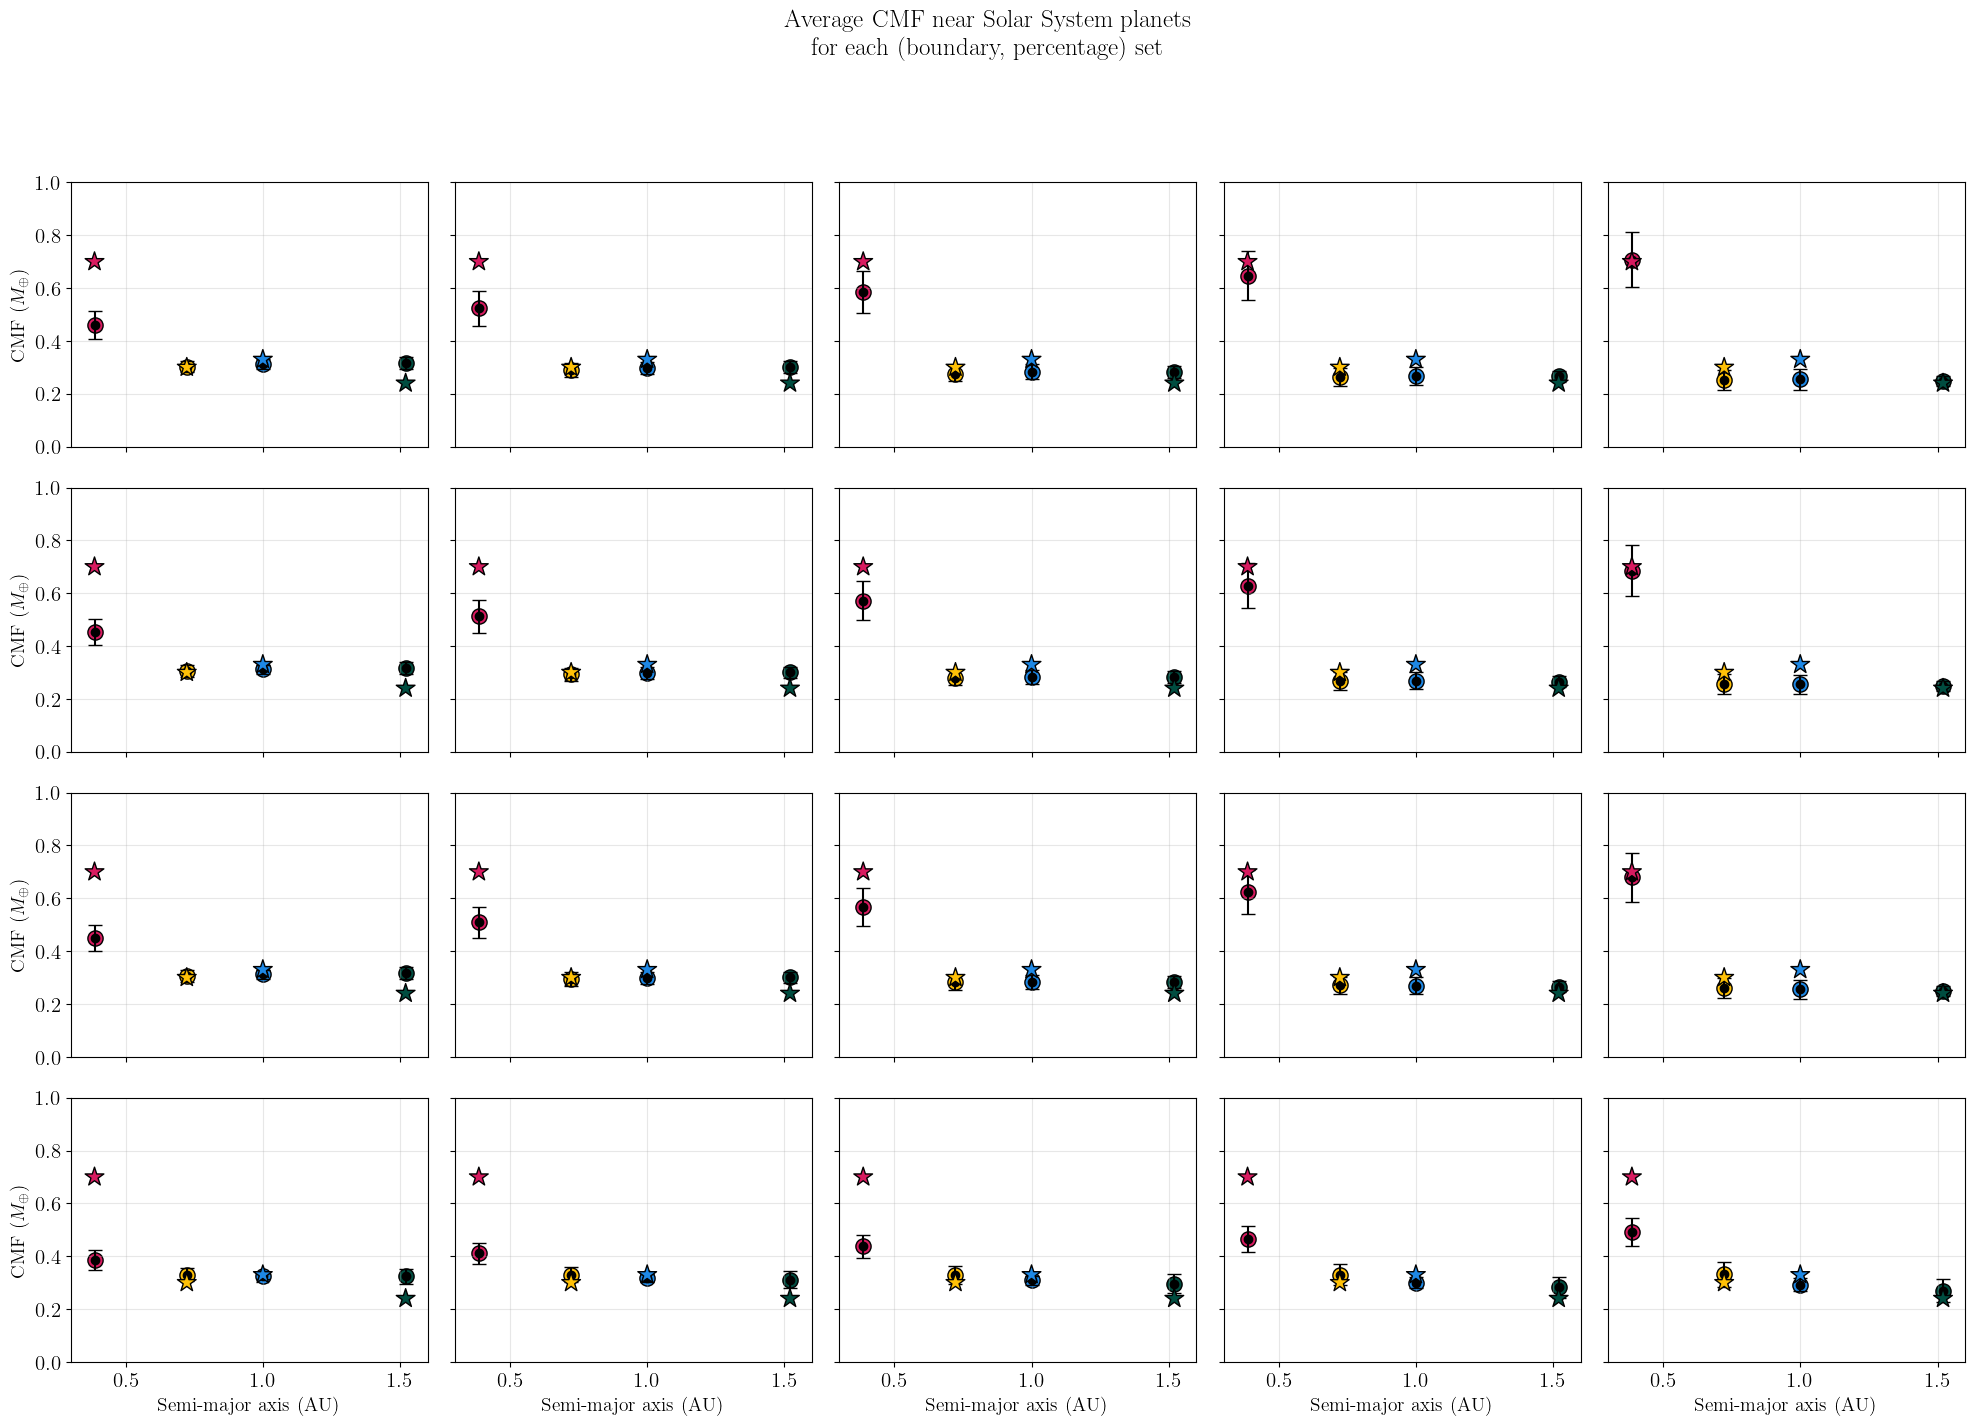

In [14]:
planet_names = ['Mercury', 'Venus', 'Earth', 'Mars']
planet_colors = ['#D81B60', '#FFC107', '#1E88E5', '#004D40']
a_centers = [mercury['a'].values[0], venus['a'].values[0], earth['a'].values[0], mars['a'].values[0]]
real_cmfs = [mercury['CMF'].values[0], venus['CMF'].values[0], earth['CMF'].values[0], mars['CMF'].values[0]]

fig, axes = plt.subplots(len(unique_bounds), len(unique_percs),
                        figsize=(4 * len(unique_percs), 3.5 * len(unique_bounds)),
                        sharex=True, sharey=True)

for i, bound in enumerate(unique_bounds):
    for j, perc in enumerate(unique_percs):
        ax = axes[i][j] if len(unique_bounds) > 1 else (axes[j] if len(unique_percs) > 1 else axes)
        df_subset = cham_bench_full_df[
            (cham_bench_full_df['boundary'] == bound) &
            (cham_bench_full_df['percentage'] == perc)
        ]
        mean_cmfs = []
        std_cmfs = []
        for a in a_centers:
            in_bin = (df_subset['semi'] >= a - 0.1) & (df_subset['semi'] <= a + 0.1)
            cmfs = df_subset.loc[in_bin, 'cmf']
            mean_cmfs.append(cmfs.mean())
            std_cmfs.append(cmfs.std())
        # Plot simulated means with errorbars
        ax.errorbar(a_centers, mean_cmfs, yerr=std_cmfs, fmt='o', color='k', capsize=5)
        for idx in range(4):
            ax.scatter(a_centers[idx], mean_cmfs[idx], color=planet_colors[idx], s=120, edgecolor='black')
        # Plot real values as stars
        ax.scatter(a_centers, real_cmfs, color=planet_colors, s=200, marker='*', edgecolor='black', zorder=5)
        ax.set_xlim(0.3, 1.6)
        ax.set_ylim(0, 1)
        ax.grid(True, alpha=0.3)
        if i == len(unique_bounds) - 1:
            ax.set_xlabel('Semi-major axis (AU)', fontsize=14)
        if j == 0:
            ax.set_ylabel(r'CMF ($M_\oplus$)', fontsize=14)

fig.suptitle('Average CMF near Solar System planets\nfor each (boundary, percentage) set', fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [15]:
# Prepare to collect results for all (boundary, percentage) sets
results = []

for i, bound in enumerate(unique_bounds):
    for j, perc in enumerate(unique_percs):
        df_subset = cham_bench_full_df[
            (cham_bench_full_df['boundary'] == bound) &
            (cham_bench_full_df['percentage'] == perc)
        ]
        for planet, a, color in zip(planet_names, a_centers, planet_colors):
            in_bin = (df_subset['semi'] >= a - 0.1) & (df_subset['semi'] <= a + 0.1)
            cmfs = df_subset.loc[in_bin, 'cmf']
            results.append({
                'boundary': bound,
                'percentage': perc,
                'planet': planet,
                'a_center': a,
                'mean_cmf': cmfs.mean(),
                'std_cmf': cmfs.std(),
                'n_in_bin': len(cmfs)
            })

# Convert to DataFrame and save
avg_cmf_df = pd.DataFrame(results)
avg_cmf_df.to_csv("average_cmf_grid.csv", index=False)

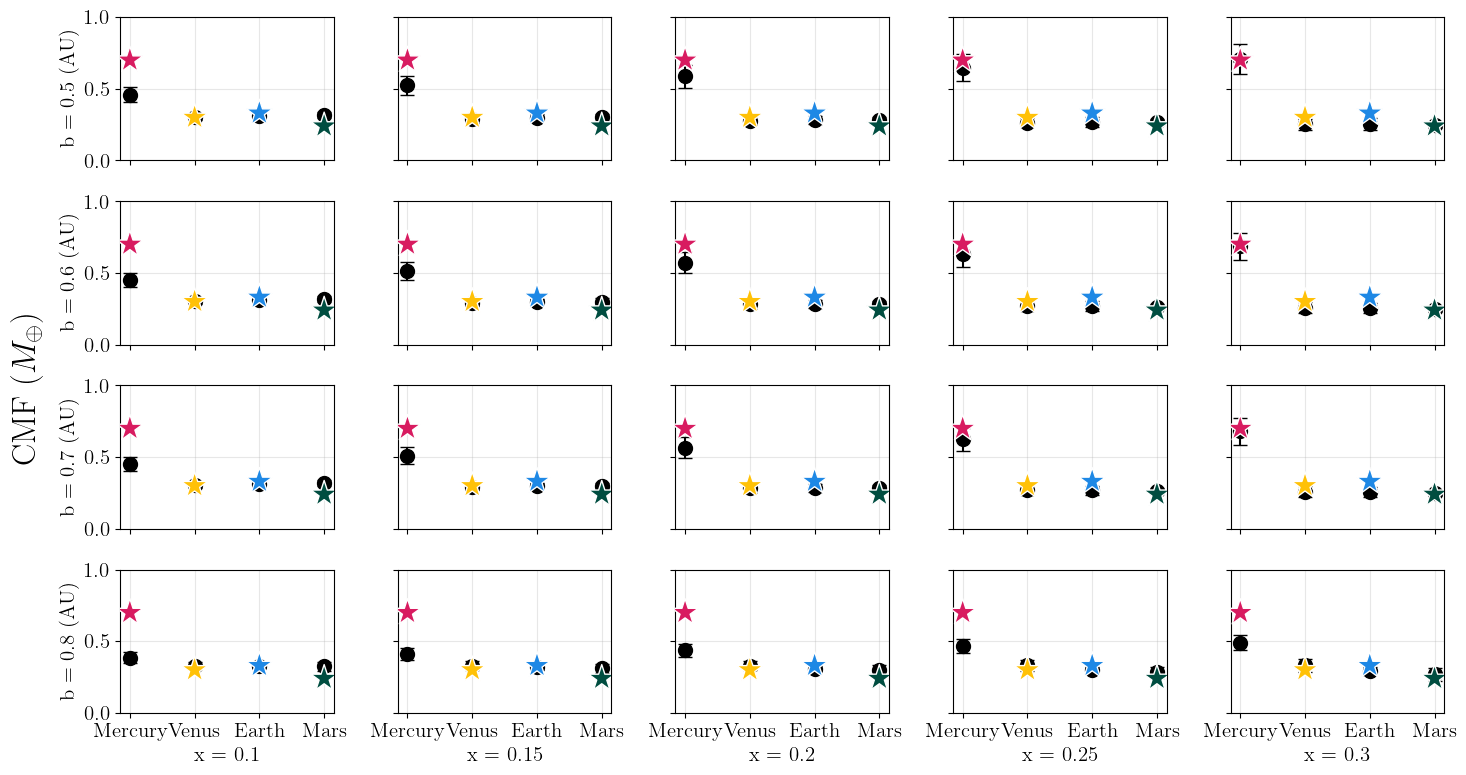

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the saved averages
avg_cmf_df = pd.read_csv("average_cmf_grid.csv")

planet_names = ['Mercury', 'Venus', 'Earth', 'Mars']
planet_colors = ['#D81B60', '#FFC107', '#1E88E5', '#004D40']
real_cmfs = [
    mercury['CMF'].values[0],
    venus['CMF'].values[0],
    earth['CMF'].values[0],
    mars['CMF'].values[0]
]

unique_bounds = sorted(avg_cmf_df['boundary'].unique())
unique_percs = sorted(avg_cmf_df['percentage'].unique())

fig, axes = plt.subplots(len(unique_bounds), len(unique_percs),
                         figsize=(3 * len(unique_percs), 2 * len(unique_bounds)),
                         sharex=True, sharey=True)

for i, bound in enumerate(unique_bounds):
    for j, perc in enumerate(unique_percs):
        ax = axes[i][j] if len(unique_bounds) > 1 else (axes[j] if len(unique_percs) > 1 else axes)
        df_sub = avg_cmf_df[(avg_cmf_df['boundary'] == bound) & (avg_cmf_df['percentage'] == perc)]
        means = [df_sub[df_sub['planet'] == p]['mean_cmf'].values[0] for p in planet_names]
        stds = [df_sub[df_sub['planet'] == p]['std_cmf'].values[0] for p in planet_names]
        x = np.arange(len(planet_names))
        # Plot simulated means with errorbars
        ax.errorbar(x, means, yerr=stds, fmt='o', color='k', capsize=5, markersize = 10)
        #for idx in range(4):
        #    ax.scatter(x[idx], means[idx], color=planet_colors[idx], )
        # Plot real values as stars
        ax.scatter(x, real_cmfs, color=planet_colors, s=400, marker='*', edgecolor='white', zorder=5)
        ax.set_xticks(x)
        ax.set_xticklabels(planet_names)
        ax.set_ylim(0, 1)
        ax.grid(True, alpha=0.3)
        if i == len(unique_bounds) - 1:
            ax.set_xlabel(f"x = {perc}")
        if j == 0:
            ax.set_ylabel(f"b = {bound} (AU)")

#fig.suptitle('Average CMF for each planet\nfor each (boundary, percentage) set', fontsize=18, y=1.02)
fig.supylabel(r'CMF ($M_\oplus$)', fontsize=24, x=0.02)
plt.tight_layout()
plt.savefig('paper_plots/solarsystem_compare.pdf', dpi=300)
plt.show()